# Seeds dataset with KNN
## Yoav Ram

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', DeprecationWarning)

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay

# Seeds dataset

Let's start by loading the dataset.

In [4]:
df = pd.read_csv('../data/seeds_dataset.txt', sep='\t')
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove,cultivar
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Regression

The seeds dataset has seven features:
area, perimeter, compactness, kernel_length, kernel_width, asymmetry, and kernel_groove.

**Train a KNN regressor to predict each feature from the other six features, and print the score.**

In [5]:
feature_names = list(df.columns)
feature_names.remove('cultivar')

X = df[feature_names].values

In [6]:
for i, feature in enumerate(feature_names):
    cols = list(range(len(feature_names)))
    cols.remove(i)
    y_ = X[:, i]
    X_ = X[:, cols]
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=0)
    
    regressor = KNeighborsRegressor()
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    print('{:20} R2 = {:.2f}'.format(feature, score))

area                 R2 = 0.97
perimeter            R2 = 0.98
compactness          R2 = 0.68
kernel_length        R2 = 0.90
kernel_width         R2 = 0.95
asymmetry            R2 = 0.01
kernel_groove        R2 = 0.81


For the feature with the lowest R2, **plot the prediction error plot.**

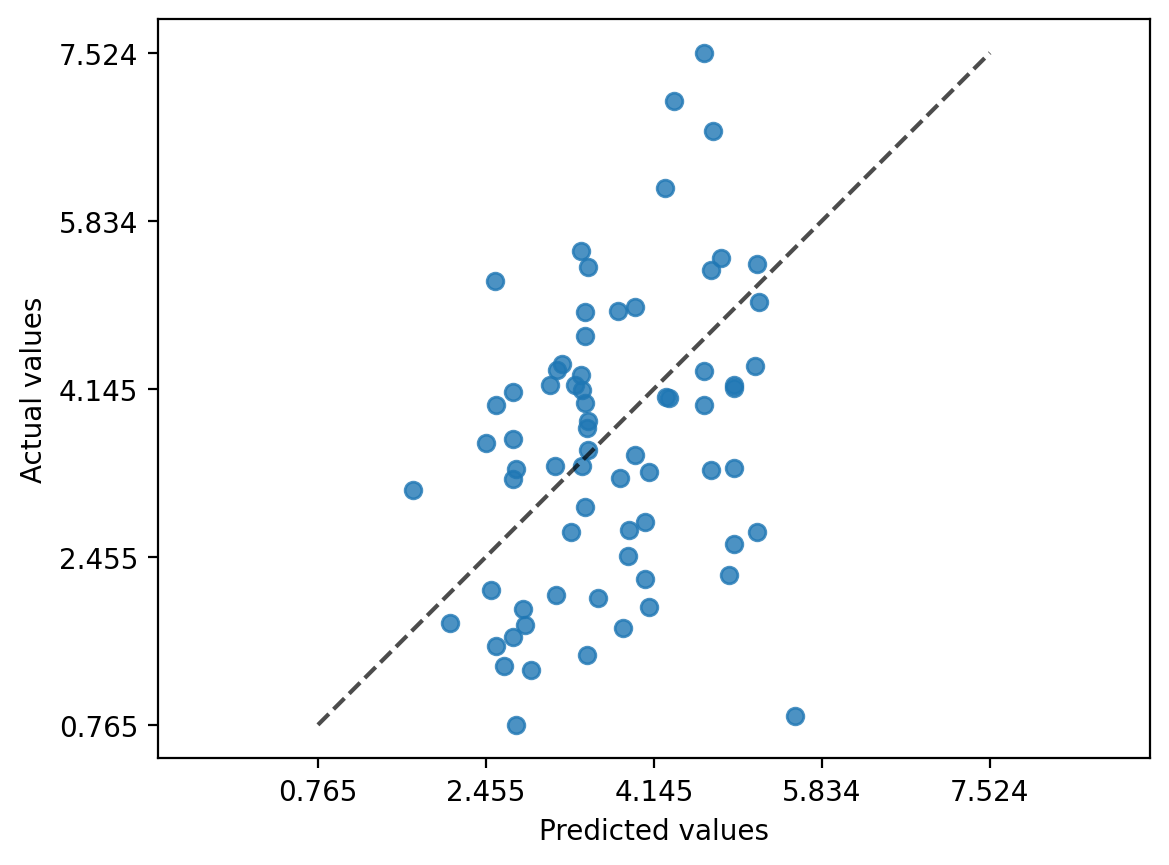

In [7]:
i = 5
cols = list(range(len(feature_names)))
cols.remove(i)
y_ = X[:, i]
X_ = X[:, cols]
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=0)

regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

PredictionErrorDisplay.from_estimator(regressor, X_test, y_test, kind="actual_vs_predicted");

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)